# Question 1
# Using Deliverytime, Predict delivery time using sorting time

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# load the dataset  for delivery time as mentioned in question 1
delivery=pd.read_csv(r"C:\Users\Asus\Downloads\delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
### finding correlation
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
x=delivery['Sorting Time']
y=delivery['Delivery Time']

In [7]:
x

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [8]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

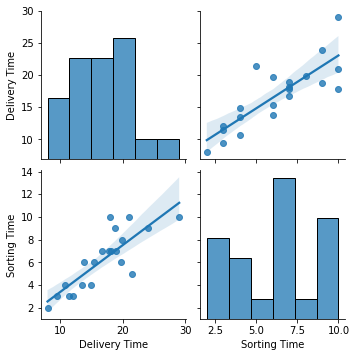

In [9]:
sns.pairplot(delivery, kind='reg')
plt.show()

In [10]:
### finding correlation
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
corr=np.corrcoef(x,y)
print(corr)


[[1.         0.82599726]
 [0.82599726 1.        ]]


In [12]:
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

In [13]:
predictions

0     25.652463
1     10.260985
2     15.391478
3     23.087216
4     25.652463
5     15.391478
6     17.956724
7      7.695739
8     25.652463
9     23.087216
10    20.521970
11    10.260985
12    17.956724
13     7.695739
14     7.695739
15    10.260985
16    15.391478
17    17.956724
18     5.130493
19    17.956724
20    12.826231
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    6.12e-15
Time:                        09:39:51   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now I will do transformation on x,y and both to change model accuracy
# above model is without transformation of data

In [15]:
# here I will do log transformation on x
x_log=np.log(delivery['Sorting Time'])
print(x_log)

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting Time, dtype: float64


In [16]:
# now I will build new model with log transformed x data
model1=sm.OLS(y,x_log).fit()

In [17]:
pred1=model1.predict(x_log)
print(pred1)

0     22.267289
1     13.406244
2     17.327319
3     21.248394
4     22.267289
5     17.327319
6     18.818042
7     10.624197
8     22.267289
9     21.248394
10    20.109366
11    13.406244
12    18.818042
13    10.624197
14    10.624197
15    13.406244
16    17.327319
17    18.818042
18     6.703122
19    18.818042
20    15.564167
dtype: float64


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    6.12e-15
Time:                        09:39:53   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# now I will log transform y data
y_log=np.log(delivery['Delivery Time'])
y_log

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery Time, dtype: float64

In [20]:
# now I will build new model with transformed y data
model2=sm.OLS(y_log,x).fit()
pred2=model2.predict(x)
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    3.00e-12
Time:                        09:39:55   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# again I will build new model using log transformed x and y data 
model3=sm.OLS(y_log,x_log).fit()
pred3=model3.predict(x_log)
print(pred3)

0     3.545002
1     2.134304
2     2.758547
3     3.382791
4     3.545002
5     2.758547
6     2.995874
7     1.691396
8     3.545002
9     3.382791
10    3.201455
11    2.134304
12    2.995874
13    1.691396
14    1.691396
15    2.134304
16    2.758547
17    2.995874
18    1.067152
19    2.995874
20    2.477850
dtype: float64


In [22]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    5.72e-17
Time:                        09:39:56   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# I will do square root transformation on x and y and both and make model to see changes 
x_sqrt=np.sqrt(delivery['Sorting Time'])
model4=sm.OLS(y,x_sqrt).fit()
pred4=model4.predict(x_sqrt)
print(pred4)
model4.summary()

0     21.967162
1     13.893253
2     17.015691
3     20.839880
4     21.967162
5     17.015691
6     18.379046
7     12.031910
8     21.967162
9     20.839880
10    19.648027
11    13.893253
12    18.379046
13    12.031910
14    12.031910
15    13.893253
16    17.015691
17    18.379046
18     9.824014
19    18.379046
20    15.533129
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    1.88e-17
Time:                        09:39:57   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# I will do square root transformation on x and y and both and make model to see changes 
y_sqrt=np.sqrt(delivery['Delivery Time'])
model5=sm.OLS(y_sqrt,x).fit()
pred5=model5.predict(x_sqrt)
print(pred5)
model.summary()

0     1.873833
1     1.185116
2     1.451465
3     1.777674
4     1.873833
5     1.451465
6     1.567761
7     1.026341
8     1.873833
9     1.777674
10    1.676007
11    1.185116
12    1.567761
13    1.026341
14    1.026341
15    1.185116
16    1.451465
17    1.567761
18    0.838004
19    1.567761
20    1.325000
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    6.12e-15
Time:                        09:39:57   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model6=sm.OLS(y_sqrt,x_sqrt).fit()
pred6=model6.predict(x_sqrt)
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    2.10e-20
Time:                        09:39:58   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We will use model6 as it has the best R square value
# there are more transformation like arcsine, reciprocal , box-cox ,YJ but I have used only two transformations

# Question 2
# Using Salary_hike, Build a prediction model for Salary_hike

In [26]:
# loading the dataset of salary for Q2
salary=pd.read_csv(r"C:\Users\Asus\Downloads\Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [27]:
x=salary['YearsExperience']
y=salary['Salary']

In [28]:
x ,y

(0      1.1
 1      1.3
 2      1.5
 3      2.0
 4      2.2
 5      2.9
 6      3.0
 7      3.2
 8      3.2
 9      3.7
 10     3.9
 11     4.0
 12     4.0
 13     4.1
 14     4.5
 15     4.9
 16     5.1
 17     5.3
 18     5.9
 19     6.0
 20     6.8
 21     7.1
 22     7.9
 23     8.2
 24     8.7
 25     9.0
 26     9.5
 27     9.6
 28    10.3
 29    10.5
 Name: YearsExperience, dtype: float64,
 0      39343.0
 1      46205.0
 2      37731.0
 3      43525.0
 4      39891.0
 5      56642.0
 6      60150.0
 7      54445.0
 8      64445.0
 9      57189.0
 10     63218.0
 11     55794.0
 12     56957.0
 13     57081.0
 14     61111.0
 15     67938.0
 16     66029.0
 17     83088.0
 18     81363.0
 19     93940.0
 20     91738.0
 21     98273.0
 22    101302.0
 23    113812.0
 24    109431.0
 25    105582.0
 26    116969.0
 27    112635.0
 28    122391.0
 29    121872.0
 Name: Salary, dtype: float64)

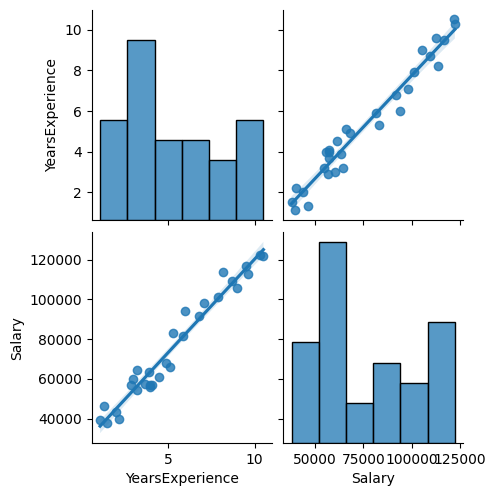

In [29]:
sns.pairplot(salary,kind='reg')
plt.show()

In [30]:
# finding the correlation
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [31]:
corr=np.corrcoef(x,y)
print(corr)

[[1.         0.97824162]
 [0.97824162 1.        ]]


In [32]:
# now I will build model without transformation 
model7=sm.OLS(x,y).fit()
pred7=model7.predict()
print(pred7)
model7.summary()

[2.88827099 3.39202809 2.76992992 3.19528238 2.92850108 4.15823515
 4.41576646 3.99694772 4.73107348 4.19839183 4.64099625 4.09598128
 4.18136011 4.19046327 4.48631595 4.98750361 4.847359   6.09970414
 5.97306745 6.89637742 6.73472292 7.21447411 7.4368408  8.35523213
 8.03361164 7.75104663 8.58699564 8.26882553 8.98503863 8.9469375 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    2.56e-24
Time:                        09:40:01   Log-Likelihood:                         -42.105
No. Observations:                  30   AIC:                                      86.21
Df Residuals:                      29   BIC:                                      87.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary      7.341e-05   2.27e-06     32.376      0.000    6.88e-05    7.81e-05
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.709
Skew:                           0.152   Prob(JB):                        0.701
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# now I will use reciprocal transformation for x, y and check my model performance
x_rec=np.reciprocal(x)
x_rec

0     0.909091
1     0.769231
2     0.666667
3     0.500000
4     0.454545
5     0.344828
6     0.333333
7     0.312500
8     0.312500
9     0.270270
10    0.256410
11    0.250000
12    0.250000
13    0.243902
14    0.222222
15    0.204082
16    0.196078
17    0.188679
18    0.169492
19    0.166667
20    0.147059
21    0.140845
22    0.126582
23    0.121951
24    0.114943
25    0.111111
26    0.105263
27    0.104167
28    0.097087
29    0.095238
Name: YearsExperience, dtype: float64

In [34]:
# as using reciprocal transformation R Squared value is very very low, no need to use this model 
# simply I will use log and square root transformations 
x_log=np.log(salary['YearsExperience'])
model9=sm.OLS(y,x_log).fit()
pred9=model9.predict(x_log)
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    8.06e-26
Time:                        09:40:02   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# now I will build model using x_rec transformation 
model8=sm.OLS(x_rec,y).fit()
pred8=model8.predict(x_rec)
pred8
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.371
Model:                            OLS   Adj. R-squared (uncentered):              0.350
Method:                 Least Squares   F-statistic:                              17.12
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    0.000275
Time:                        09:40:03   Log-Likelihood:                         -3.0683
No. Observations:                  30   AIC:                                      8.137
Df Residuals:                      29   BIC:                                      9.538
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary      2.554e-06   6.17e-07      4.138      0.000    1.29e-06    3.82e-06
==============================================================================
Omnibus:                        9.363   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.886
Skew:                           1.170   Prob(JB):                       0.0194
Kurtosis:                       3.910   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y_log=np.log(salary['Salary'])
model10=sm.OLS(y_log,x).fit()
pred10=model10.predict(x)
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    6.09e-12
Time:                        09:40:03   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model11=sm.OLS(y_log,x_log).fit()
pred11=model11.predict(x_log)
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    8.60e-15
Time:                        09:40:04   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_sqrt=np.sqrt(salary['YearsExperience'])
model12=sm.OLS(y,x_sqrt).fit()
pred12=model12.predict()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    3.62e-30
Time:                        09:40:04   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
y_sqrt=np.sqrt(salary['Salary'])
model13=sm.OLS(y_sqrt,x).fit()
pred13=model13.predict()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    2.12e-16
Time:                        09:40:04   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model14=sm.OLS(y_sqrt,x_sqrt).fit()
pred14=model14.predict(x_sqrt)
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                    2.81e-29
Time:                        09:40:05   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""